In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score

In [25]:
df1=pd.read_csv('zomato.csv')
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [26]:
df2=pd.read_csv('country-code.csv')
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [27]:
df=pd.merge (df1,df2) 
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [28]:
df.shape

(9551, 22)

In [29]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [30]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


In [33]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
6023,18204494,King Bar & Restaurant,1,New Delhi,"7/7, Desh Bandhu Gupta Road, Paharganj, New Delhi",Paharganj,"Paharganj, New Delhi",77.212265,28.645340,"North Indian, Chinese, Continental",...,Yes,No,No,No,2,3.0,Orange,Average,10,India
5985,18367984,Mr. Sub,1,New Delhi,"Lower Ground Floor Pacific Mall, Tagore Garden...","Pacific Mall, Tagore Garden","Pacific Mall, Tagore Garden, New Delhi",77.106218,28.642557,Fast Food,...,No,No,No,No,1,2.8,Orange,Average,6,India
4917,18414470,Faasos,1,New Delhi,"A-160, Near Laxmi Nagar Metro Pillar 41 & 42,...",Laxmi Nagar,"Laxmi Nagar, New Delhi",77.281711,28.634161,"North Indian, Fast Food",...,No,Yes,No,No,2,2.6,Orange,Average,10,India
74,6701257,Meats,30,S��o Paulo,"Rua dos Pinheiros, 320, Pinheiros, S��o Paulo",Pinheiros,"Pinheiros, S��o Paulo",-46.681333,-23.564833,"Gourmet Fast Food, Burger",...,No,No,No,No,4,4.3,Green,Very Good,68,Brazil
1873,306719,Angeethi,1,Gurgaon,"200, Main Market, Sector 31, Gurgaon",Sector 31,"Sector 31, Gurgaon",77.051070,28.453493,"North Indian, Chinese, Mughlai",...,No,No,No,No,1,2.7,Orange,Average,73,India


In [34]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [35]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Checking Null Values

<Axes: >

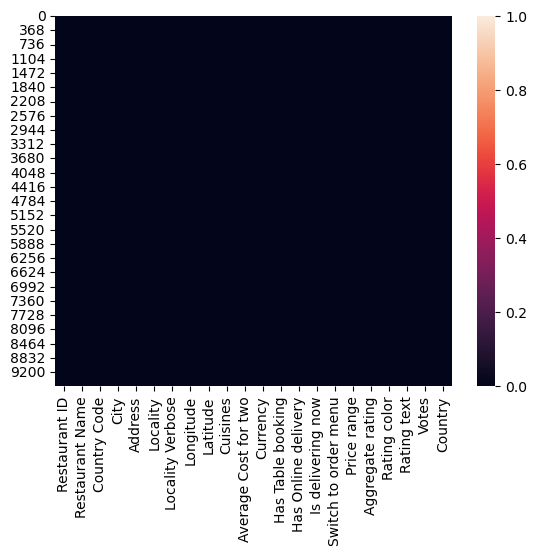

In [37]:
sns.heatmap(df.isnull())

In [38]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [39]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


Droping the columns which are not useful in predictive analysis because these variables are qualitative

In [40]:
columns_to_drop = ['Restaurant ID', 'Restaurant Name','City','Address',
                  'Locality', 'Locality Verbose','Cuisines']
df=df.drop(columns_to_drop,axis=1)

In [41]:
df.shape

(9551, 15)

Data Visulaization

<Axes: xlabel='Country Code', ylabel='count'>

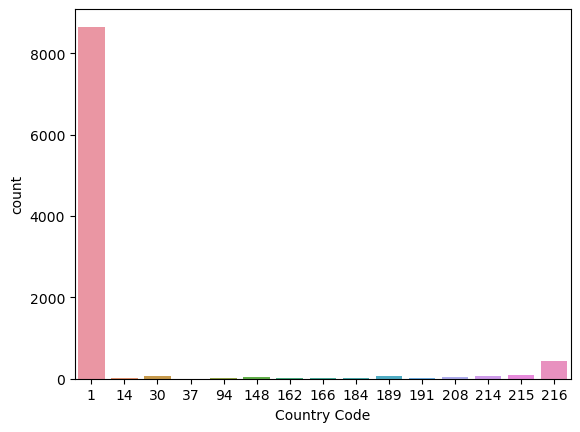

In [42]:
sns.countplot(data=df, x='Country Code')

<Axes: xlabel='Currency', ylabel='count'>

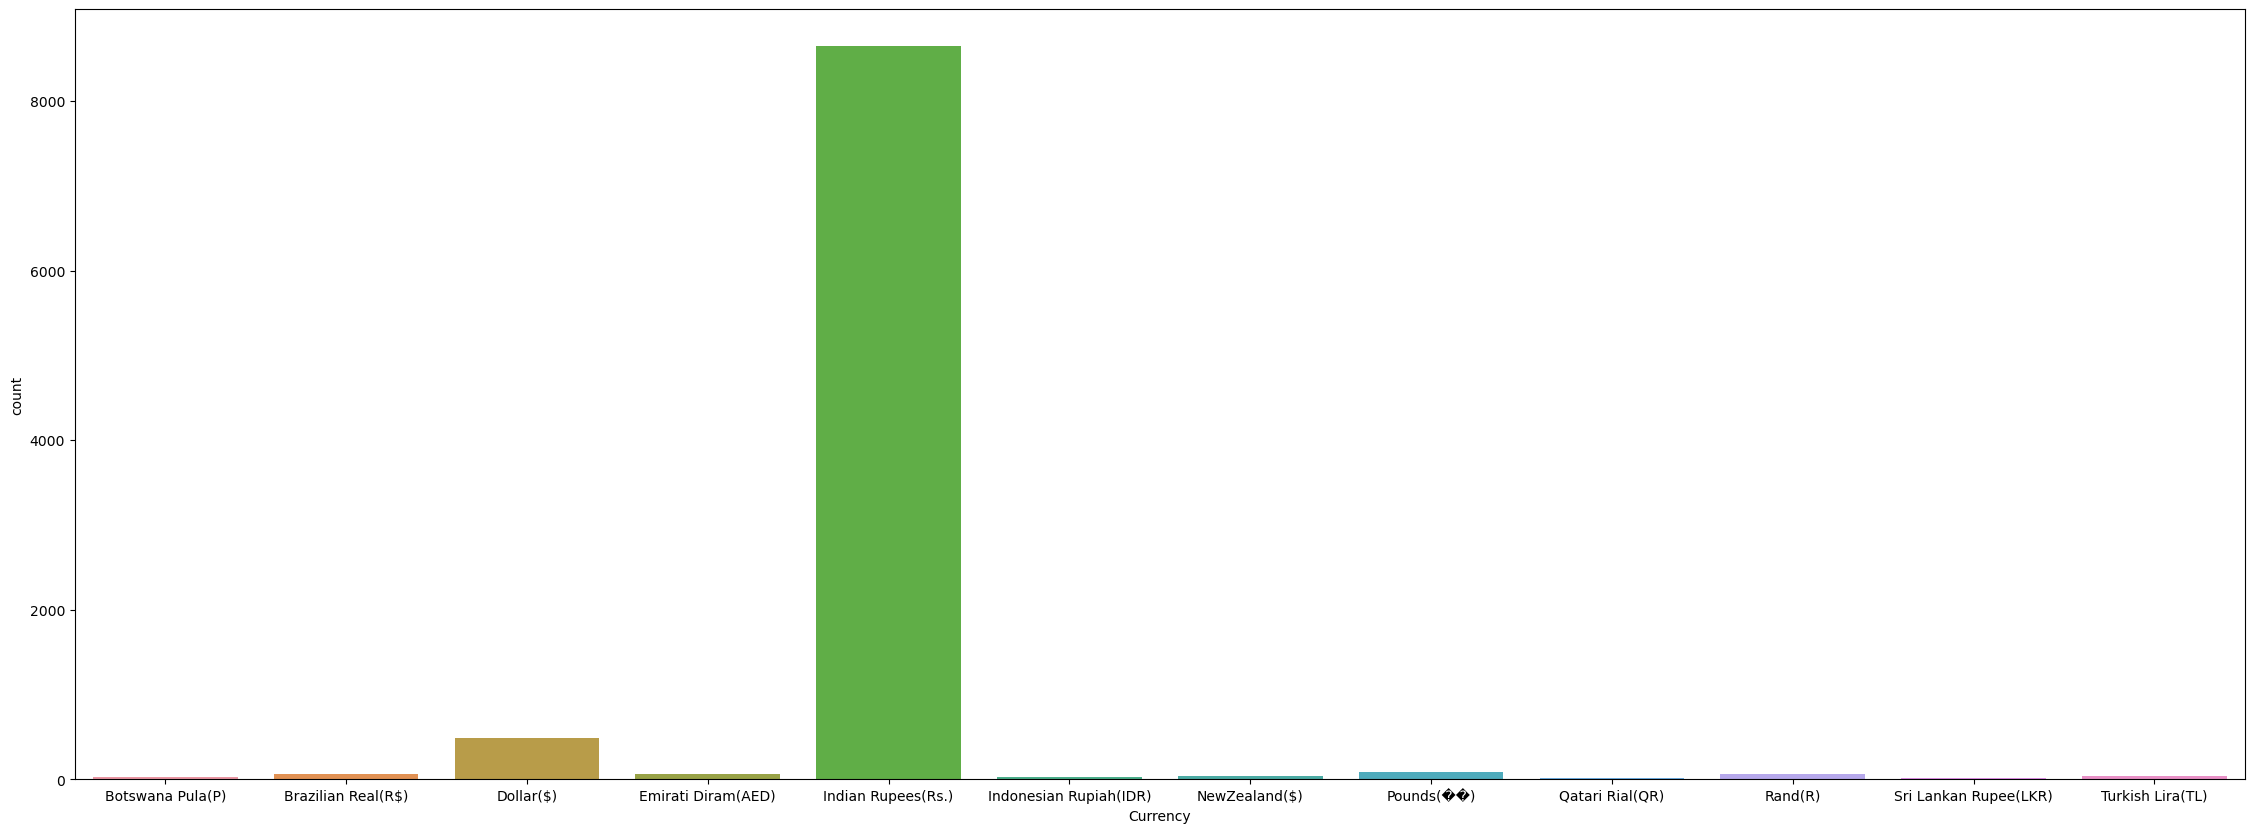

In [43]:
plt.figure(figsize=[28,10])
sns.countplot(data=df, x='Currency')

<Axes: xlabel='Has Table booking', ylabel='count'>

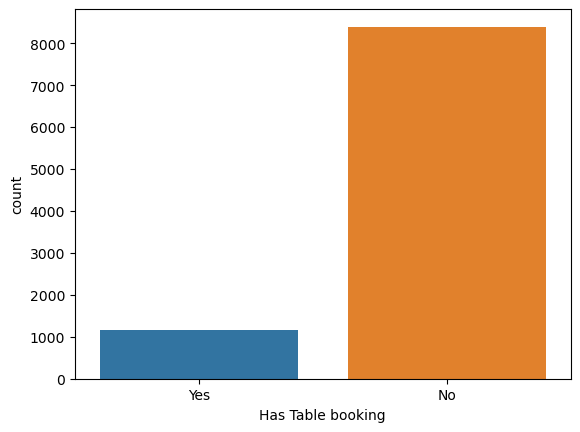

In [44]:
sns.countplot(data=df, x='Has Table booking')

<Axes: xlabel='Has Online delivery', ylabel='count'>

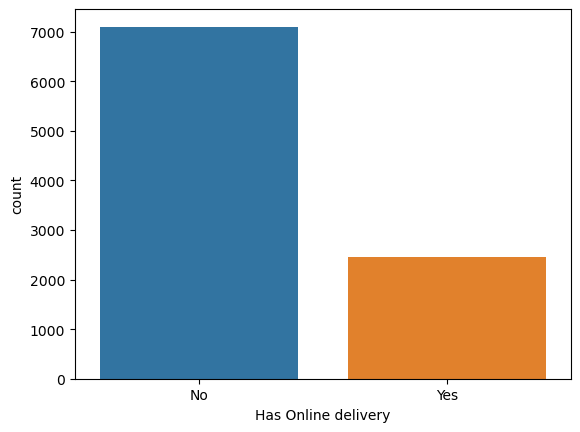

In [45]:
sns.countplot(data=df, x='Has Online delivery')

<Axes: xlabel='Is delivering now', ylabel='count'>

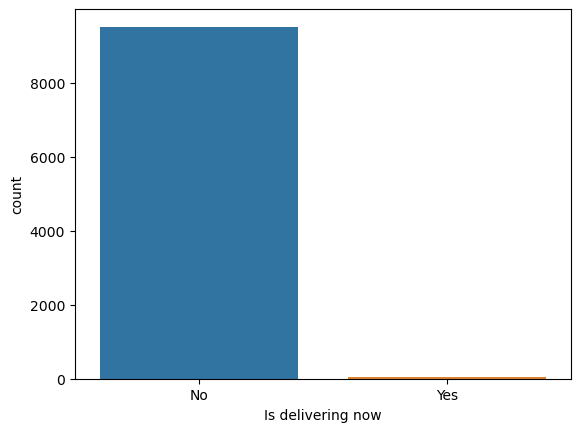

In [46]:
sns.countplot(data=df, x='Is delivering now')

<Axes: xlabel='Switch to order menu', ylabel='count'>

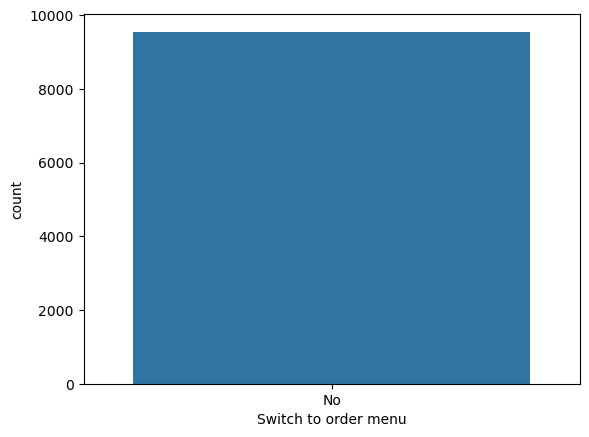

In [47]:
sns.countplot(data=df, x='Switch to order menu')

<Axes: xlabel='Price range', ylabel='count'>

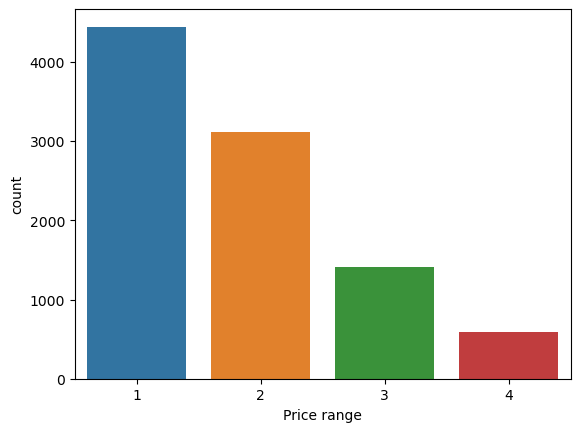

In [48]:
sns.countplot(data=df, x='Price range')

array([[<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Votes'}>,
        <Axes: title={'center': 'Average Cost for two'}>]], dtype=object)

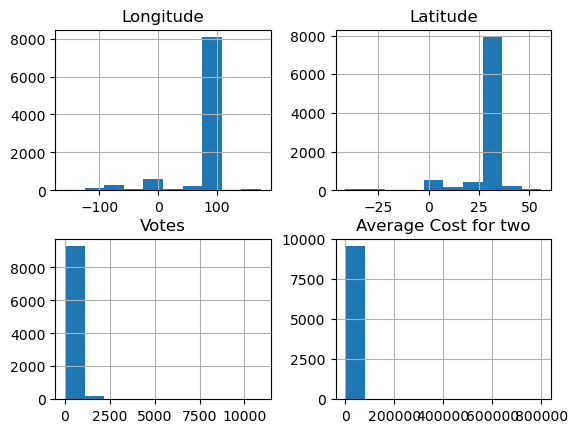

In [49]:
df.hist(['Longitude', 'Latitude','Votes', 'Average Cost for two'])

Checking Outliers

In [50]:
df.shape

(9551, 15)

Country Code               Axes(0.125,0.747241;0.227941x0.132759)
Longitude               Axes(0.398529,0.747241;0.227941x0.132759)
Latitude                Axes(0.672059,0.747241;0.227941x0.132759)
Average Cost for two       Axes(0.125,0.587931;0.227941x0.132759)
Price range             Axes(0.398529,0.587931;0.227941x0.132759)
Aggregate rating        Axes(0.672059,0.587931;0.227941x0.132759)
Votes                      Axes(0.125,0.428621;0.227941x0.132759)
dtype: object

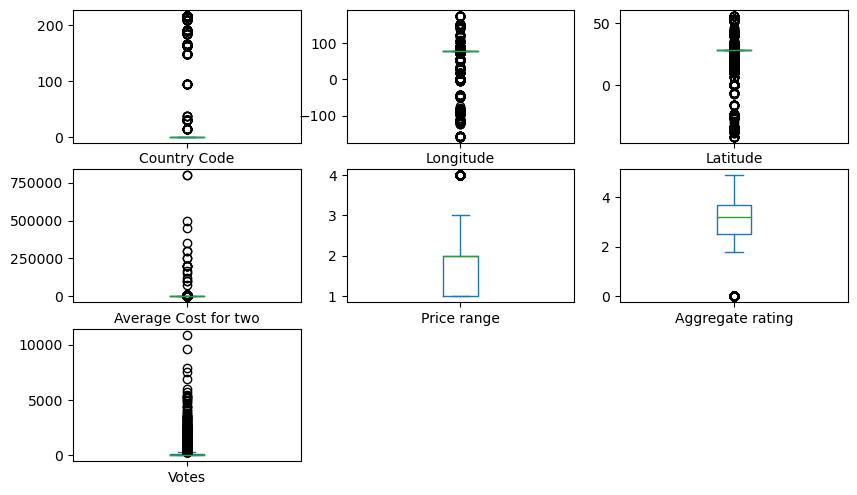

In [51]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(10,10))

In [52]:
Q1 = df['Country Code'].quantile(0.25)
Q3 = df['Country Code'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Country Code'] >= lower_bound) & (df['Country Code'] <= upper_bound)]

In [53]:
Q1 = df['Longitude'].quantile(0.25)
Q3 = df['Longitude'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Longitude'] >= lower_bound) & (df['Longitude'] <= upper_bound)]

In [54]:
Q1 = df['Latitude'].quantile(0.25)
Q3 = df['Latitude'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

 
df = df[(df['Latitude'] >= lower_bound) & (df['Latitude'] <= upper_bound)]

In [55]:
Q1 = df['Average Cost for two'].quantile(0.25)
Q3 = df['Average Cost for two'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Average Cost for two'] >= lower_bound) & (df['Average Cost for two'] <= upper_bound)]

In [56]:
Q1 = df['Votes'].quantile(0.25)
Q3 = df['Votes'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df = df[(df['Votes'] >= lower_bound) & (df['Votes'] <= upper_bound)]

Correlation Matrix

<Axes: >

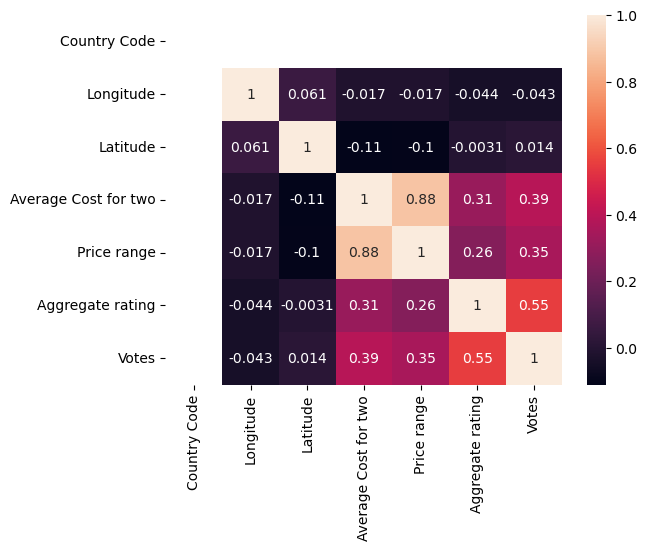

In [57]:
sns.heatmap(df.corr(),annot=True)

Checking Skewness

array([[<Axes: title={'center': 'Country Code'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Average Cost for two'}>,
        <Axes: title={'center': 'Price range'}>,
        <Axes: title={'center': 'Aggregate rating'}>],
       [<Axes: title={'center': 'Votes'}>, <Axes: >, <Axes: >]],
      dtype=object)

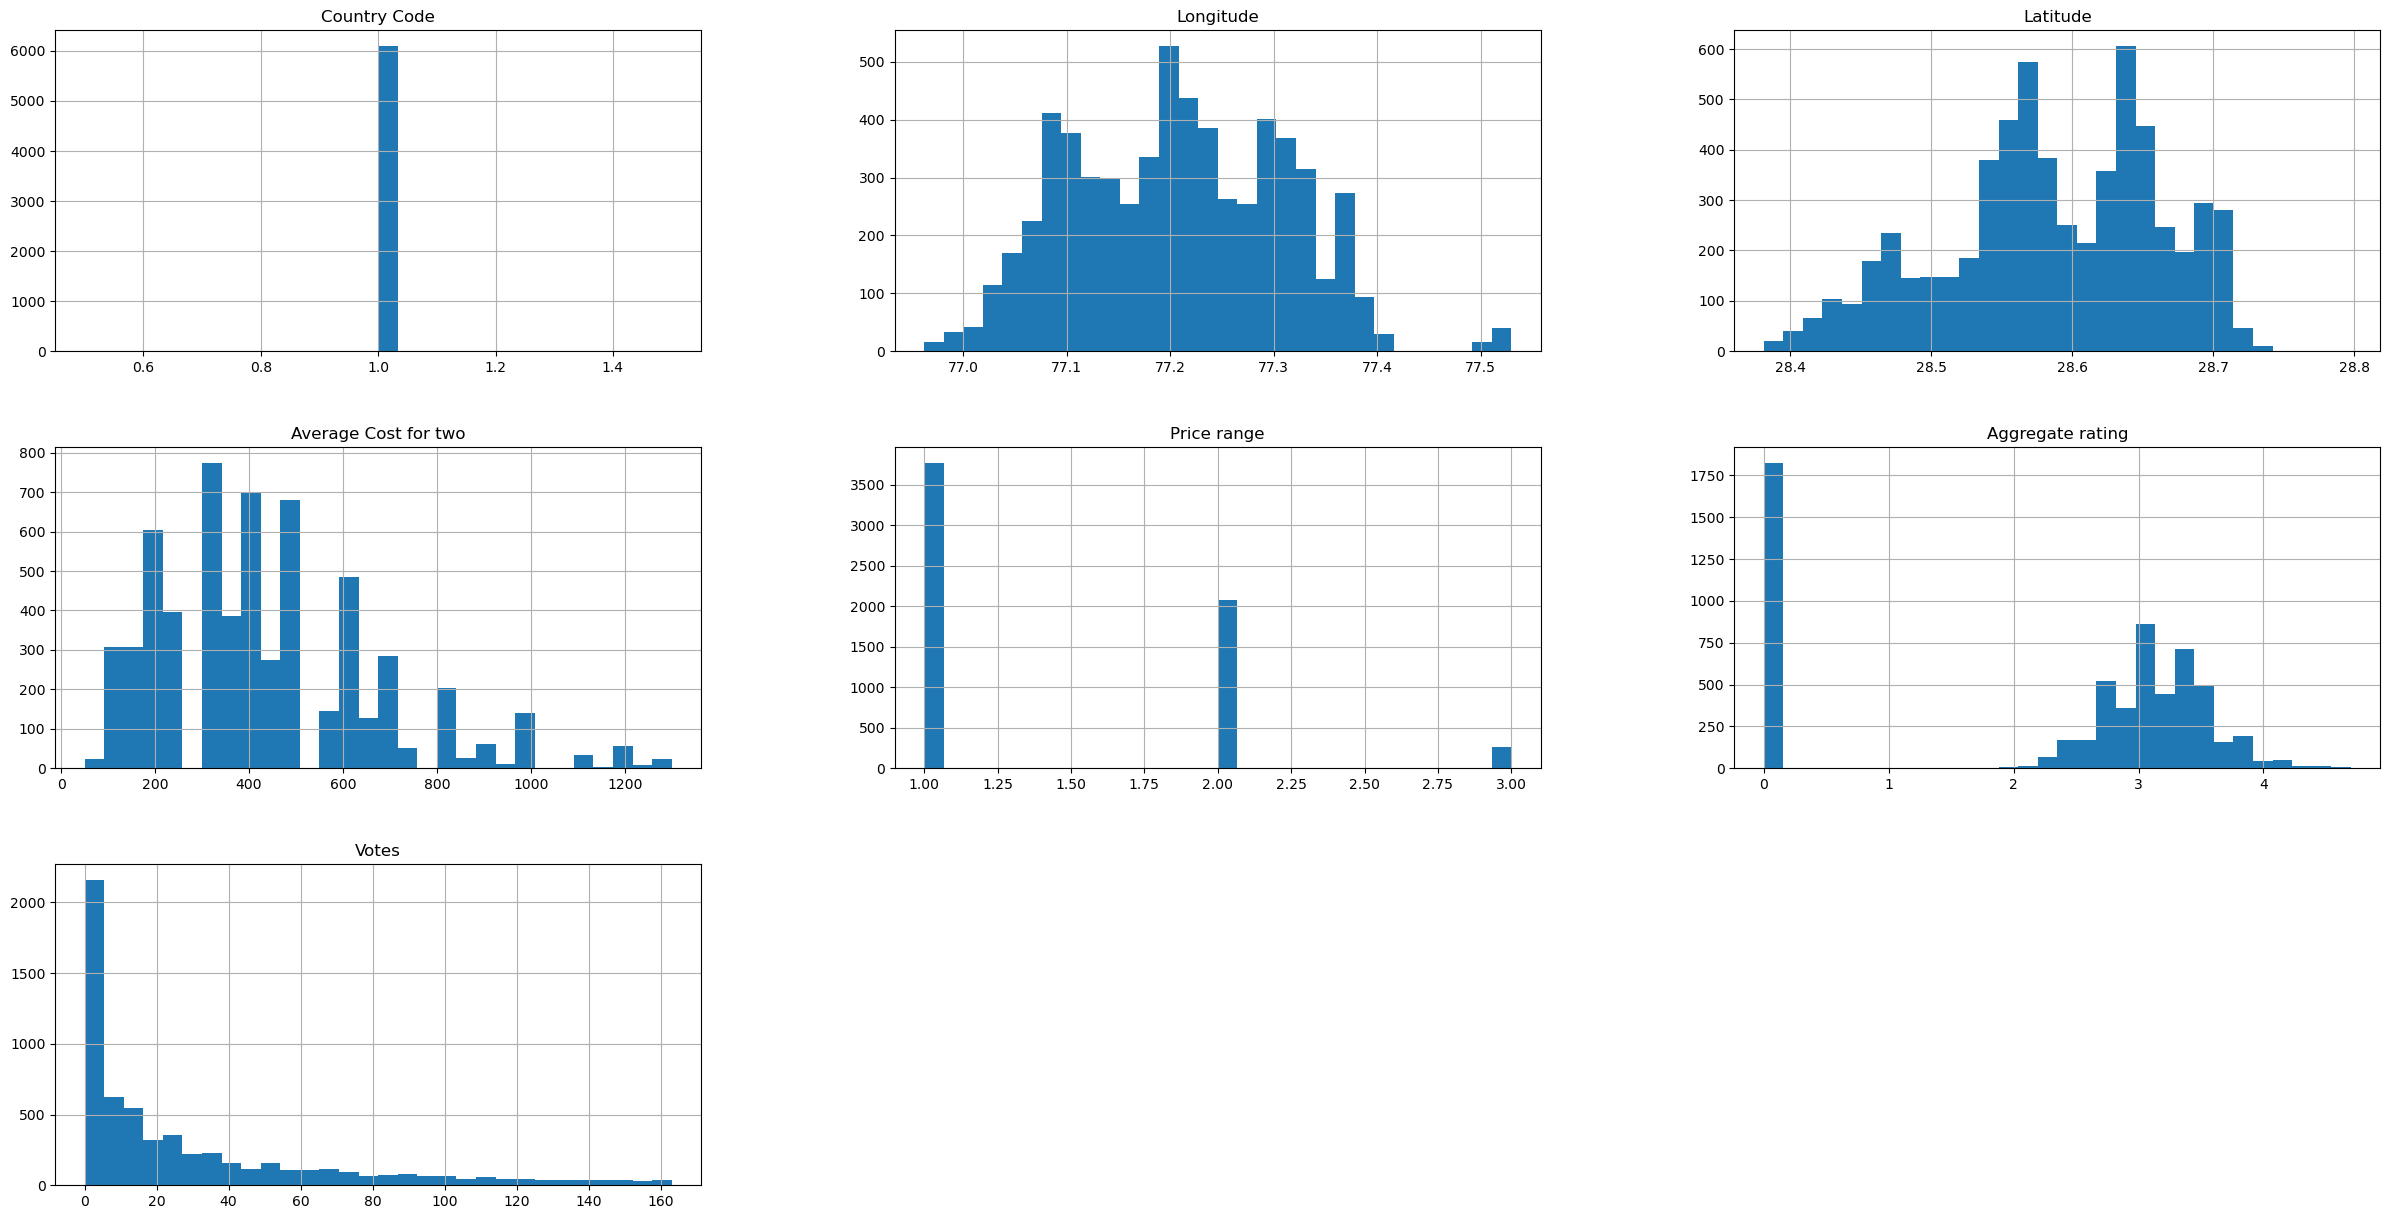

In [58]:
df.hist(bins=30,figsize=(30,15))

In [59]:
df.skew()

Country Code            0.000000
Longitude               0.139980
Latitude               -0.359956
Average Cost for two    1.017028
Price range             0.974048
Aggregate rating       -0.708241
Votes                   1.612405
dtype: float64

Using LabelEncoder for converting Categorical datatype columns to Numerical datatype

In [60]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [61]:
df['Currency'] = encoder.fit_transform(df['Currency'])
df['Has Table booking'] = encoder.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = encoder.fit_transform(df['Has Online delivery'])
df['Is delivering now'] = encoder.fit_transform(df['Is delivering now'])
df['Switch to order menu'] = encoder.fit_transform(df['Switch to order menu'])
df['Rating color'] = encoder.fit_transform(df['Rating color'])
df['Rating text'] = encoder.fit_transform(df['Rating text'])
df['Country'] = encoder.fit_transform(df['Country'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6107 entries, 865 to 9112
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          6107 non-null   int64  
 1   Longitude             6107 non-null   float64
 2   Latitude              6107 non-null   float64
 3   Average Cost for two  6107 non-null   int64  
 4   Currency              6107 non-null   int32  
 5   Has Table booking     6107 non-null   int32  
 6   Has Online delivery   6107 non-null   int32  
 7   Is delivering now     6107 non-null   int32  
 8   Switch to order menu  6107 non-null   int32  
 9   Price range           6107 non-null   int64  
 10  Aggregate rating      6107 non-null   float64
 11  Rating color          6107 non-null   int32  
 12  Rating text           6107 non-null   int32  
 13  Votes                 6107 non-null   int64  
 14  Country               6107 non-null   int32  
dtypes: float64(3), int3

Prediction with Average Cost for two

Implementing Machine Learning thru Linear Regression

In [63]:
x=df.drop(['Average Cost for two'],axis=1)
y=df['Average Cost for two']

Seperated target and its features so that x only has input variables and y only has output variable



In [64]:
x

,Country Code,Longitude,Latitude,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
865,1,77.306640,28.490059,0,0,0,0,0,1,2.9,2,0,4,0
866,1,77.304776,28.490157,0,0,0,0,0,2,2.8,2,0,16,0
867,1,77.305563,28.490137,0,0,0,0,0,1,2.8,2,0,8,0
868,1,77.306102,28.490098,0,0,0,0,0,1,2.9,2,0,8,0
869,1,77.305745,28.490062,0,0,0,0,0,1,2.8,2,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108,1,77.367524,28.557537,0,0,1,0,0,2,2.6,2,0,34,0
9109,1,77.367303,28.557929,0,0,0,0,0,1,0.0,4,3,1,0
9110,1,77.367188,28.557842,0,0,0,0,0,2,0.0,4,3,3,0
9111,1,77.367322,28.557930,0,0,0,0,0,2,0.0,4,3,0,0


In [65]:
y

865     250
866     500
867     150
868     150
869     100
       ... 
9108    700
9109    400
9110    600
9111    500
9112    250
Name: Average Cost for two, Length: 6107, dtype: int64

Creating train test split

Training phase will get 70% of distribution and testing phase will get 30% of distribution.

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4274, 14)
(1833, 14)
(4274,)
(1833,)


In [67]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [68]:
LR.coef_

array([ 0.00000000e+00,  1.56412636e+01, -7.00254977e+01, -7.10542736e-14,
        1.87454331e+02,  2.16014668e+01,  1.74975226e+01, -2.84217094e-14,
        3.10901312e+02,  9.13925407e+00, -4.27226490e+00,  2.26204721e+00,
        2.81073364e-01,  0.00000000e+00])

In [69]:
LR.score(x_train,y_train)

0.8159958122830843

In [70]:
LRpred=LR.predict(x_test)
print("Predicted value", LRpred)
print("Actual value", y_test)

Predicted value [326.97276774 615.40867277 308.39577487 ... 278.24338201 591.04685742
 298.97751695]
Actual value 3004    400
4581    700
4825    150
5050    450
6197    350
       ... 
9087    300
953     150
3376    300
6272    600
8106    450
Name: Average Cost for two, Length: 1833, dtype: int64


The above data shows the predicted value and the actual value.

In [71]:
print('Mean Squared Error:', MSE(y_test, LRpred))
print('Mean Absolute Error:', MAE(y_test, LRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, LRpred)))

print('R2 Score:', r2_score(y_test, LRpred))

Mean Squared Error: 10150.688733293826
Mean Absolute Error: 83.8097202578216
Root Mean Squared Error: 100.75062646601174
R2 Score: 0.820917579916873


Using Random Forest Regressor

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4885, 14)
(1222, 14)
(4885,)
(1222,)


In [73]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
RFR.score(x_train,y_train)

0.9725903866686969

The above score shows that the model did really good in its traing phase.

In [75]:
RFRpred=RFR.predict(x_test)
print("Predicted value", RFRpred)
print("Actual value", y_test)

Predicted value [381.5 543.5 346.  ... 613.5 303.  292.5]
Actual value 3004    400
4581    700
4825    150
5050    450
6197    350
       ... 
8016    450
1992    350
8709    550
1104    100
5625    350
Name: Average Cost for two, Length: 1222, dtype: int64


In [76]:
print('Mean Squared Error:', MSE(y_test, RFRpred))
print('Mean Absolute Error:', MAE(y_test, RFRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, RFRpred)))

print('R2 Score:', r2_score(y_test, RFRpred))

Mean Squared Error: 10390.307508183305
Mean Absolute Error: 83.56857610474631
Root Mean Squared Error: 101.93285784369682
R2 Score: 0.8208432812919249


Prediction with Price Range

Implementing Machine Learning thru Linear Regression

In [77]:
x=df.drop(['Price range'],axis=1)
y=df['Price range']

Seperated target and its features so that x only has input variables and y only has output variable

In [79]:
x

,Country Code,Longitude,Latitude,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Aggregate rating,Rating color,Rating text,Votes,Country
865,1,77.306640,28.490059,250,0,0,0,0,0,2.9,2,0,4,0
866,1,77.304776,28.490157,500,0,0,0,0,0,2.8,2,0,16,0
867,1,77.305563,28.490137,150,0,0,0,0,0,2.8,2,0,8,0
868,1,77.306102,28.490098,150,0,0,0,0,0,2.9,2,0,8,0
869,1,77.305745,28.490062,100,0,0,0,0,0,2.8,2,0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9108,1,77.367524,28.557537,700,0,0,1,0,0,2.6,2,0,34,0
9109,1,77.367303,28.557929,400,0,0,0,0,0,0.0,4,3,1,0
9110,1,77.367188,28.557842,600,0,0,0,0,0,0.0,4,3,3,0
9111,1,77.367322,28.557930,500,0,0,0,0,0,0.0,4,3,0,0


In [80]:
y

865     1
866     2
867     1
868     1
869     1
       ..
9108    2
9109    1
9110    2
9111    2
9112    1
Name: Price range, Length: 6107, dtype: int64

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4274, 14)
(1833, 14)
(4274,)
(1833,)


Creating train test split

Training phase will get 70% of distribution and testing phase will get 30% of distribution.

In [82]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [83]:
LR.score(x_train,y_train)

0.7822902377258898

The above score shows that the model how much model performed in its traing phase.

In [84]:
LRpred=LR.predict(x_test)
print("Predicted value", LRpred)
print("Actual value", y_test)

Predicted value [1.38227055 2.02991886 0.81861127 ... 1.11681399 1.77620521 1.46350581]
Actual value 3004    1
4581    2
4825    1
5050    1
6197    1
       ..
9087    1
953     1
3376    1
6272    2
8106    1
Name: Price range, Length: 1833, dtype: int64


In [85]:
print('Mean Squared Error:', MSE(y_test, LRpred))
print('Mean Absolute Error:', MAE(y_test, LRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, LRpred)))

print('R2 Score:', r2_score(y_test, LRpred))

Mean Squared Error: 0.07294511096994206
Mean Absolute Error: 0.23050389714126024
Root Mean Squared Error: 0.2700835259136367
R2 Score: 0.7846395837455755


The model has an Root Mean Squared Error score of ~0.27. This implies that lower is the RMSE score, therefore model is performing better at making predictions.

Using Random Forest Regressor

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4885, 14)
(1222, 14)
(4885,)
(1222,)


In [87]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

RandomForestRegressor()

In [88]:
RFR.score(x_train,y_train)

1.0

The above score shows that the model did really good in its traing phase.

In [90]:
RFRpred=RFR.predict(x_test)
print("Predicted value", RFRpred)
print("Actual value", y_test)

Predicted value [1. 2. 1. ... 2. 1. 1.]
Actual value 3004    1
4581    2
4825    1
5050    1
6197    1
       ..
8016    1
1992    1
8709    2
1104    1
5625    1
Name: Price range, Length: 1222, dtype: int64


In [91]:
print('Mean Squared Error:', MSE(y_test, RFRpred))
print('Mean Absolute Error:', MAE(y_test, RFRpred))

print('Root Mean Squared Error:', np.sqrt(MSE(y_test, RFRpred)))

print('R2 Score:', r2_score(y_test, RFRpred))

Mean Squared Error: 0.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0
R2 Score: 1.0


The model has an Root Mean Squared Error score of 0. This implies that lower is the RMSE score, therefore model is performing better at making predictions.